# Assignments Week VIII.<br><br>Signal Processing in Action Option A: Music Fingerprint
<hr style="height:1px; border:none; background-color:blue;">

<p style="color: #ee5353;"> For Week VIII there are two options: either option A or option B. <i>You only need to complete one of these for the mandatory assignments.</i></p>

### Useful Information

**In this notebook you will be working on the mandatory assignments for week eight of Signal Processing**. In order to complete the notebook you must complete all of the necessary code blocks (labelled with "Write your code here"), and fill in all answer blocks. Each section of the notebook will state the completion criteria, which summarize everything you need to do to complete that section. **If you are stuck on a section in this notebook, it may be beneficial to check the non-mandatory exercises for this week, since they may have content that can help you!**

Mandatory assignments are pass or fail. **If your notebook is incomplete - meaning you did not complete the task required or answer the necessary questions - then you will automatically fail.** So once you finish this notebook, please look through it to make sure you've answered everything!

<hr style="height:1px; border:none; background-color:blue;">

### Objectives
- Experience the use of spectra/DFT in real-world computer science applications.
- Learn how to extract relevant features from spectra/DFTs.
- Understand perceptual aspects of signal processing.

<br>
<hr style="height:3px; border:none; background-color:blue;">

<h3 style="color:blue;"> <u>Imports for Exercises and Assignments </u></h3> 

Run the code below to import modules that will be used throughout the rest of this notebook.

<br>

In [14]:
##########################################################################################
# Import various modules into PYTHON. These will be used throughput this Jupyter Notebook
##########################################################################################
# import matplotlib for data visualisation
import matplotlib.pyplot as plt

# import NumPy for better matrix support
import numpy as np

# import Pickle for data serialisation
import pickle as pkl

# import wav for reading files
from scipy.io import wavfile as wv

# import audio for playing audio
from IPython.display import Audio, display

# add path for importing modules to './data'. 
import sys
sys.path.insert(0, './data')

#######################################################################################
#
# function for easy plotting of signals with centered axis and larger figure
#
#   nicesignalplot(scale,values,caption)
#      scale:   array with vertical scale values 't' (float)
#      values:  array with signal values 'x(t)' to plot (float or complex, 
#               in latter case .real will be used)
#      caption: caption of the plot (string)
#
######################################################################################
def nicesignalplot(scale,values,caption):
    myfigure  =  plt.figure(figsize=(15,7.5))
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot( scale, values)
    plt.title('(nicesignalplot): '+caption)
    plt.show()

###########################################################################################
#
# function for easy plotting of DFT magnitude spectrum with centered axis and larger figure
#
#      nicemagspecplot(N,dftvalues,caption,hvsize, [ylabel] )
#      N:          number of samples in x[n] and X[k], is equal to the applied DFT length
#      dftvalues:  array with complex-valued DFT coefficient X[k].
#      caption: caption of the plot (string)
#      hvsize = [hsize,vsize]: array with horizontal width and vertical height of plot. 
#                              Try hvsize = [7,4]
#      ylabel = optional string for naming vertical axis. Default is |X(ω)|.
#
##########################################################################################
def nicemagspecplot(N,dftvalues,caption,hvsize,ylabel='$|X(\hat{\omega})|$'):
    myfigure  = plt.figure(figsize=hvsize)
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.stem(np.arange(N) * (2 * np.pi / N), np.abs(dftvalues))
    plt.title('(nicemagspecplot): '+caption)
    plt.xlabel('$\hat{\omega}$',fontsize=16,horizontalalignment='right',x=0.95)
    plt.ylabel(ylabel,fontsize=16,horizontalalignment='right',y=0.95)
    plt.show()
    
########################################################################################
#
# function for easy plotting of DFT phase spectrum with centered axis and larger figure
#
#      nicephasespecplot(N,dftvalues,caption,hvsize, [ylabel] )
#      N:          number of samples in x[n] and X[k], is equal to the applied DFT length
#      dftvalues:  array with complex-valued DFT coefficient X[k].
#      caption:    caption of the plot (string)
#      hvsize = [hsize,vsize]: array with horizontal width and vertical height of plot. 
#                              Try hvsize = [7,4]
#      ylabel = optional string for naming vertical axis. Default is arg(X(ω)).
#
#########################################################################################
def nicephasespecplot(N,dftvalues,caption,hvsize,ylabel='arg$(X(\hat{\omega}))$'):
    myfigure  = plt.figure(figsize=hvsize)
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.stem(np.arange(N) * (2 * np.pi / N), np.angle(dftvalues))
    plt.title('(nicephasespecplot): '+caption)
    plt.xlabel('$\hat{\omega}$',fontsize=16,horizontalalignment='right',x=0.95)
    plt.ylabel(ylabel,fontsize=16,horizontalalignment='right',y=0.95)
    plt.show()

<>:64: SyntaxWarning: invalid escape sequence '\h'
<>:79: SyntaxWarning: invalid escape sequence '\h'
<>:96: SyntaxWarning: invalid escape sequence '\h'
<>:111: SyntaxWarning: invalid escape sequence '\h'
<>:64: SyntaxWarning: invalid escape sequence '\h'
<>:79: SyntaxWarning: invalid escape sequence '\h'
<>:96: SyntaxWarning: invalid escape sequence '\h'
<>:111: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_229953/2218682192.py:64: SyntaxWarning: invalid escape sequence '\h'
  def nicemagspecplot(N,dftvalues,caption,hvsize,ylabel='$|X(\hat{\omega})|$'):
/tmp/ipykernel_229953/2218682192.py:79: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('$\hat{\omega}$',fontsize=16,horizontalalignment='right',x=0.95)
/tmp/ipykernel_229953/2218682192.py:96: SyntaxWarning: invalid escape sequence '\h'
  def nicephasespecplot(N,dftvalues,caption,hvsize,ylabel='arg$(X(\hat{\omega}))$'):
/tmp/ipykernel_229953/2218682192.py:111: SyntaxWarning: invalid escape sequence '\h'
  plt.xlab

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT VI.1 ---------------------------------------------------------------------->

 
<h3 style="color:blue;"> <u>Python Hands-on Assignment VIII.1: Music compression, the essence of MP3</u></h3>  
    
<br>
<div style="background-color:#c2eafa">
<br>
<b>Completion requirements for this assigment.</b>
<ul>
<li>Explain how the choice of $L$ relates to the factor of compression.</li>
<li>Show and explain the pseudocolor plot of the retained non-zero DFT coefficients for three different choices of $L$.</li>
<li>Find out which value of $L$ gives an acceptable audio quality on the given audio sample.</li>
<li>Explain to what extent the choice of $L$ affects audio quality on two different audio samples.
</ul>
<hr>
</div>

We explore the principles of today’s compression algorithms such as mp3, jpeg, and the different mpeg video compression standards. The fundamental observation in all compression methods is that if a signal (music, image, video) is represented in a spectral form (i.e. in the frequency transform domain), many transform coefficient are very small and could be ignored. Hence fewer transform coefficients than samples in the original signal are needed to still get a decent perceptual quality. In most compression standards, a variation on the DFT is used, namely the DCT or Discrete Cosine Transform. In this assignment, we will use the DFT/FFT for the purpose of simplicity.

**Read the music file `data/musicclip.wav` into the array named `mmdata`, and listen to the 10 seconds of music.**

Note: If you're stuck, referring to the exercises for this week will likely help.

<br>

In [ ]:
SAMPLE_RATE, mmdata = wv.read("data/musicclip.wav")
display(Audio(mmdata, rate=SAMPLE_RATE))

print(f"Sampling frequency: {SAMPLE_RATE}")

Sampling frequency: 44100


<br>

**What is the sampling frequency of the music?**

<br>

<div class="alert alert-block alert-success">
    <b>44.1 kHz</b>
</div>

<br>

Most compression algorithms work with time segments (frames) or spatial segment (for instance image blocks). We therefore break up the audio into short non-overlapping frames, so that we can process each frame independently. We use as frame length of $N=512$ samples. 

**Convert the audio signal to frames, following the procedure of Python exercise VIII.1. Since we are going to process each frame in the Fourier domain, compute for each frame the DFT. Name the resulting 2-D array of DFT-ed frames `MMFRAMES`.**

<br>

In [ ]:
FRAME_LENGTH = 512
FRAME_COUNT   = int(len(mmdata)/FRAME_LENGTH)

frames = mmdata[:FRAME_COUNT * FRAME_LENGTH]
frames = mmdata.reshape([FRAME_COUNT, FRAME_LENGTH]) 

MMFRAMES = np.fft.fft(frames, axis=1)

print(f"Frame duration: {FRAME_LENGTH * (1 / SAMPLE_RATE)}s")

Frame duration: 0.011609977324263039s


<br>

**What is the length in seconds of each frame?**

<br>

<div class="alert alert-block alert-success">
    <b>~0.01s</b>
</div>

<br>

We now have the signal available as a collection of spectra computed on a frame-by-frame basis.  Remember that for an $N$-point DFT, we obtain $N/2+1$ unique DFT coefficients, the other $N/2-1$ coefficients can be recovered because of the complex-conjugated symmetry of the spectum. However, whereas each signal samples is real-valued, the DFT coefficients are complex numbers requiring the storage of 2 numbers (real and imaginary part) per DFT coefficient. It seems therefore that in total we have $2.(N/2+1) = N+2 $ numbers to store instead of $N$ samples. However, the DFT coefficient 0 and $N/2$ are always real-valued, ending up with exactly $N$ numbers to store.

**For each frame-based spectrum in `MMFRAMES` we will keep only the $L$ largest DFT coefficients in the range $[0, \cdots, \pi] \equiv [0,\cdots,N/2]$, and ignore all other DFT coefficients by making them zero. What is the factor of compression if we keep only the $L=8$ largest DFT coefficient?**

**Find for each frame the $L$ DFT coefficients that have the largest magnitude in the range $[0,N/2]$.** A suitable Python function is, for instance, `indices=np.argsort()`. **Maintain only these $L$ largest original DFT coefficients, and set all other DFT coefficients to zero.** Notice that each frame will have the largest DFT coefficients in different positions. For instance, in frame 0 the largest two DFT coeffients might be in position 0 and 3, and in frame 1 in position 2 and 8. **Store the resulting DFT spectra (with now many zero DFT coefficients) in a 2-D array named `CMFRAMES`.**

Notice that you also have to deal with the DFT coefficients in the range $[N/2+1, N-1]$. For instance, if you make DFT-coefficient 2 equal to zero, then also DFT-coefficient $N-2=510$ must be made equal to zero to maintain the symmetry property of the spectrum. **An easy way to solve this is by keeping the $2*L-1$ largest DFT coefficients in the range $[0,N-1]$. Explain why this solution will work.**

<br>

In [ ]:
def keep_largest_coefficients(mmframes, L):
    first_half_mmframes = mmframes[:, :mmframes.shape[1] // 2 + 1]
    result = np.zeros_like(mmframes)

    for i in range(mmframes.shape[0]):
        sorted_indices = np.argsort(np.abs(first_half_mmframes[i]))[::-1][:L]
        
        for j in sorted_indices:
            result[i][j] = mmframes[i][j]

            if j != 0 and j != mmframes.shape[1] // 2:
                conj_index = mmframes.shape[1] - j
                result[i][conj_index] = mmframes[i][conj_index]

    return result

L = 8

print(f"Factor of compression with L={L}: {FRAME_LENGTH / L}")
print(f"Factor of compression keeping conjugates: {FRAME_LENGTH / (2 * L - 1)}")

CMFRAMES = keep_largest_coefficients(MMFRAMES, L)

# assert enough coefficients are kept
min_bound = (2 * L - 2) * CMFRAMES.shape[0]
max_bound = (2 * L) * CMFRAMES.shape[0]
assert np.count_nonzero(CMFRAMES) >= min_bound and np.count_nonzero(CMFRAMES) <= max_bound

# assert symmetry
assert np.allclose(CMFRAMES[:, 1:FRAME_LENGTH // 2], np.conj(CMFRAMES[:, FRAME_LENGTH-1:FRAME_LENGTH//2:-1]))

Factor of compression with L=8: 64.0
Factor of compression keeping conjugates: 34.13333333333333


<br>

**Please answer the two following question:**
<ul>
    <li>What is the factor of compression if we keep only the $L=8$ largest DFT coefficient? </li>
    <li>Additionally, it is claimed that an easy way to maintain symmetry of the spectrum is to keep the $2*L-1$ largest DFT coefficients in the range $[0,N-1]$. Explain why this solution will work.</li>
</ul>

<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<br>

The 2-D array `CMFRAMES` contains a compressed version of the music signal, where each frame in the DFT domain is represented by only $L$ non-zero DFT coefficients (plus the corresponding complex conjugated DFT values), rather than all original DFT coefficients.

**An easy way to visualize which non-zero DFT coefficients are maintained is by using a pseudo-color plot of the array `CMFRAMES`.** Use the Python command `plt.pcolor(np.log(np.abs(CMFRAMES[0:100,:int(Nframelen/8)].T)+0.001))` to **display the first 512/8 = 128 DFT coefficients of the first 100 frames of the 2-D array `CMFRAMES`.** Different pseudo-colors indicate different magnitude/size of DFT coefficients in a frame.

<br>

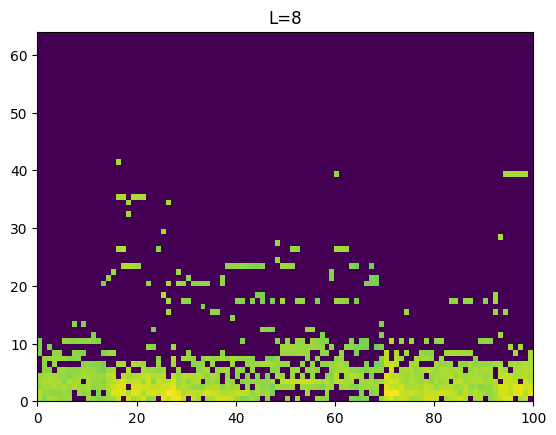

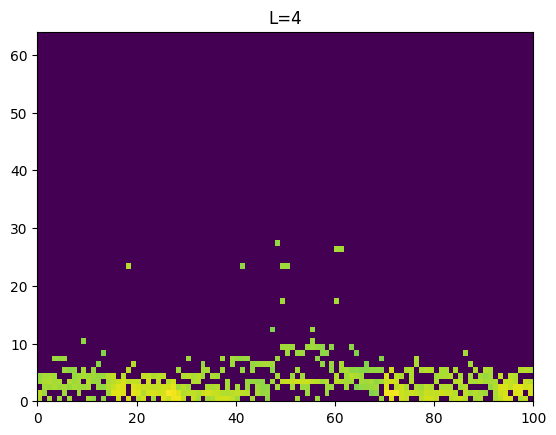

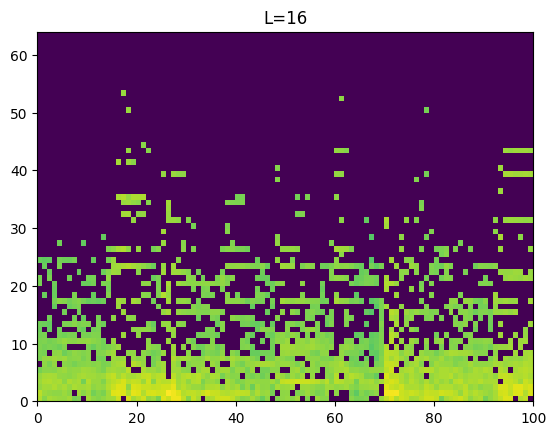

In [ ]:
def plot_cmframes(cmframes, L):
    epsilon = 0.001

    plt.figure()
    plt.title(f"L={L}")
    plt.pcolor(np.log(np.abs(cmframes[0:100, :int(FRAME_LENGTH / 8)].T) + epsilon))
    plt.show()

L = 8
plot_cmframes(keep_largest_coefficients(MMFRAMES, L), L)

L = 4
plot_cmframes(keep_largest_coefficients(MMFRAMES, L), L)

L = 16
plot_cmframes(keep_largest_coefficients(MMFRAMES, L), L)


<br>

**Study and describe the effect of using three different values of $L$. Make sure to display the plot for each value of $L$. Where are the largest DFT coefficients usually located in the spectrum? Are the same DFT coefficients selected in each frame?**

<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<br>

**Carry out an inverse DFT/FFT on each frame of CMFRAMES. Reshape the resulting array of compressed frames into a 1-D audio signal. Listen to the resulting compressed music for different values of $L$.**

<br>

In [ ]:
def get_original_signal(cmframes):
    return np.fft.ifft(cmframes, axis=1).reshape(FRAME_LENGTH * FRAME_COUNT)

print("Original audio")
original_audio = get_original_signal(MMFRAMES)
display(Audio(original_audio, rate=SAMPLE_RATE))

print("L=8")
ifft_L_8 = get_original_signal(keep_largest_coefficients(MMFRAMES, 8))
display(Audio(ifft_L_8, rate=SAMPLE_RATE))

print("L=4")
ifft_L_4 = get_original_signal(keep_largest_coefficients(MMFRAMES, 4))
display(Audio(ifft_L_4, rate=SAMPLE_RATE))

print("L=16")
ifft_L_16 = get_original_signal(keep_largest_coefficients(MMFRAMES, 16))
display(Audio(ifft_L_16, rate=SAMPLE_RATE))

print("L=32")
ifft_L_32 = get_original_signal(keep_largest_coefficients(MMFRAMES, 32))
display(Audio(ifft_L_32, rate=SAMPLE_RATE))

print("L=64")
ifft_L_64 = get_original_signal(keep_largest_coefficients(MMFRAMES, 64))
display(Audio(ifft_L_64, rate=SAMPLE_RATE))



Original audio


/home/anon/Programming/tud/cse2220-signal-processing/venv/lib64/python3.13/site-packages/IPython/lib/display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


L=8


L=4


L=16


L=32


L=64


<br>

**Determine which value of $L$ gives an acceptable audio quality and explain why. How large is the compression factor in this case?**

<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<br>

**Use the compression method that you have implemented in this assignment on other music files** (some are provided in the data set, or you can bring your own music samples), **and on the short speech segment `data/welkom.wav`. Study and describe the effect on the quality of setting different values of $L$.**

<br>

In [20]:
# Write your code here

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT VIII.2 ---------------------------------------------------------------------->
  
<h3 style="color:blue;"> <u>Python Hands-on Assignment VIII.2:  Music identification, at the core of Shazam & more</u></h3>  
  
<br>
<div style="background-color:#c2eafa">
<br>
<b>Completion requirements for this assigment.</b>
<ul>
<li>Show the fingerprints for one of the given music samples.</li>
<li>Determine which song is represented by the fingerprint `data/fingerprint.pkl`. Show the BER for each of the music clips in relation to the unknown music clip.</li>
<li>Explain how you would set a BER threshold to recognize a song in the given dataset..</li>
</ul>
<hr>
</div>

**In this assignment you will implement the basics of online music identification services such as Shazam, SoundHound, Tunatic, and Nabbit.** Music identification is based on comparing the spectrum of the query music to a database of spectra of known songs. The best matching spectrum determines which song is identified. Online music identification often involves identifying songs independently of the specific recording device, performance, artist, or even versions of the song. Here, we will focus on the problem that involves different versions of the same reference recording.

Like the compression in previous assignment, music identification is based on processing short frames of music. The way these frames are selected and which frequencies are represented in the spectrum is critical to the success of music identification. In this assignment we will take the simplest case and ignore many practical engineering issues.

Rather than storing the spectrum of the songs, a highly compact binary representation is derived from the spectrum and stored, usually called the <i>fingerprint</i> of the music. In this assignment you are given a precomputed audio-fingerprint and 25 songs (actually 5 different songs, plus 4 degraded versions of each song). The challenge is to determine which of the song(s) correspond(s) to the given fingerprint.

**The following songs are given to you; all songs have a sampling rate of 22.05 kHz, and are stored as wav-files in the directory `data/querysongs`.** The compression of the files indicated by `_4` and `_5` has been done with the technique of Python assignment VIII.1.

![PA.VII.2%28i%29.png](graphics/PA.VII.2%28i%29.png)

**The music identification that we develop operates with non-overlapping frames of $N=512$ samples each. If you have not done so, carry out Python exercise VIII.1, such that you can convert any of the above songs into a $M \times N$ array `xx`.** For the purpose of this assignment, `N=512` (the DFT/FFT will be over $N = 512$ samples) and `M = 257` (we have 257 non-overlapping frames). These array dimensions match exactly with the number of samples (namely, 131584 samples) in the audio files. 

**Load one of the audio files into `xx`, listen to the music, convert the music into an array of $M$ frames,  each of length $N$. Apply the DFT to each frame to obtain a spectrum per frame, stored as the array `XX`.** The fingerprints of the songs will be computed on the magnitude spectrum of each frame. Therefore **compute the magnitude of the spectum per frame. Display the resulting spectrogram using a pseudo-color plot.**

<br>

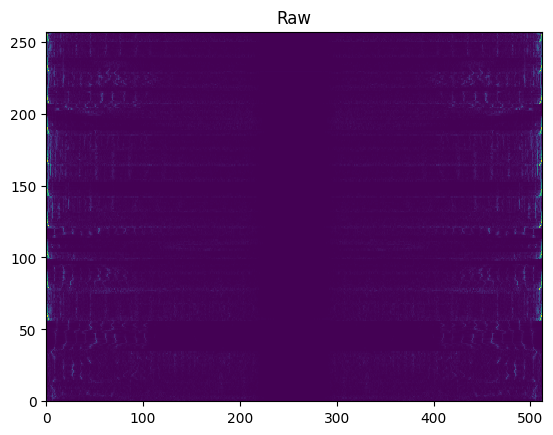

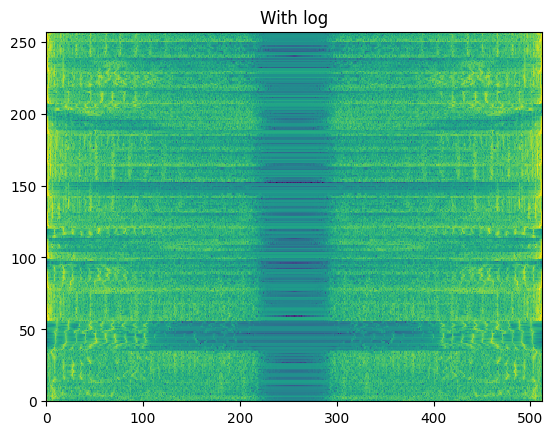

In [ ]:
# musicfiles = ['data/querysongs/query_call_me_1.wav','data/querysongs/query_call_me_2.wav',\
#               'data/querysongs/query_call_me_3.wav','data/querysongs/query_call_me_4.wav',\
#               'data/querysongs/query_call_me_5.wav',\
#               'data/querysongs/query_get_lucky_1.wav','data/querysongs/query_get_lucky_2.wav',\
#               'data/querysongs/query_get_lucky_3.wav','data/querysongs/query_get_lucky_4.wav',\
#               'data/querysongs/query_get_lucky_5.wav',\
#               'data/querysongs/query_scream_shout_1.wav','data/querysongs/query_scream_shout_2.wav',\
#               'data/querysongs/query_scream_shout_3.wav','data/querysongs/query_scream_shout_4.wav',\
#               'data/querysongs/query_scream_shout_5.wav',\
#               'data/querysongs/query_locked_out_1.wav','data/querysongs/query_locked_out_2.wav',\
#               'data/querysongs/query_locked_out_3.wav','data/querysongs/query_locked_out_4.wav',\
#               'data/querysongs/query_locked_out_5.wav',\
#               'data/querysongs/query_blurred_lines_1.wav','data/querysongs/query_blurred_lines_2.wav',\
#               'data/querysongs/query_blurred_lines_3.wav','data/querysongs/query_blurred_lines_4.wav',\
#               'data/querysongs/query_blurred_lines_5.wav']

FRAME_COUNT, FRAME_LENGTH = 257, 512

SAMPLE_RATE, xx = wv.read("data/querysongs/Query_Call_Me_1.wav")
display(Audio(xx, rate=SAMPLE_RATE))

frames = xx.reshape([FRAME_COUNT, FRAME_LENGTH])
XX = np.fft.fft(frames, axis=1)

plt.figure()
plt.pcolor(np.abs(XX))
plt.title("Raw")
plt.show()


plt.figure()
epsilon = 0.001
plt.pcolor(np.log(np.abs(XX) + epsilon))
plt.title("With log")
plt.show()


<br>

Rather than working with the magnitudes of the individual DFT/FFT coefficients, the coefficients are grouped together into 17 bands according to the so-called Bark-scale. The Bark-scale is a psychoacoustic scale proposed in 1961 by researchers of the subjective human auditory properties. The original scale represents the human auditory system in 24 critical bands of hearing. Essential to the Bark (and later proposed) scale is that it is a logarithmic scale in frequency. To obtain a 17 band Bark-scale, the first 257 (unique) DFT coefficients of a 512-point DFT are combined in the following way.

![PA.VII.2%28ii%29.png](graphics/PA.VII.2%28ii%29.png)

The above mapping from DFT coefficient number to Bark scale band is available in the numpy array `data/bark_scale_band_id.pkl`. **Load this file into an array named `BarkScaleBandID` using the command `np.load()`. Verify the correspondence of the loaded array `BarkScaleBandID` to the above table.**

<br>

In [68]:
BarkScaleBandID = np.load("data/bark_scale_band_id.pkl", allow_pickle=True)

print(BarkScaleBandID)

[ 0  1  1  2  2  2  3  3  3  4  4  4  5  5  5  5  6  6  6  6  7  7  7  7
  7  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10
 10 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16]


<br>

**For each frame, add the (magnitude of the) DFT coefficients that belong to the same Bark-scale band, yielding a array with 17 values for each frame.** These values are called Bark-scale energies. Make use of the array `BarkScaleBandID`. **Store the resulting $M \times 17$  Bark-scale energies as a 2D array `BB`. Display the resulting Bark-scale energies using a pseudo-color plot.**

<br>

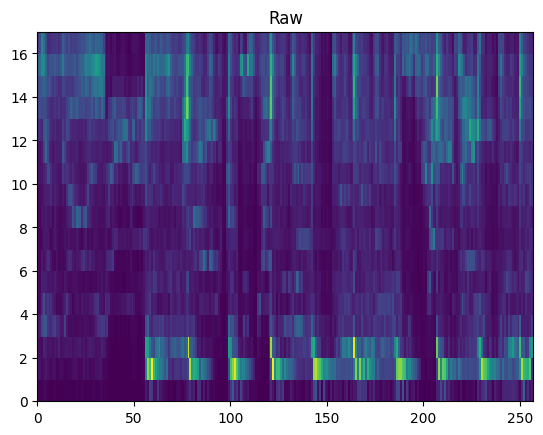

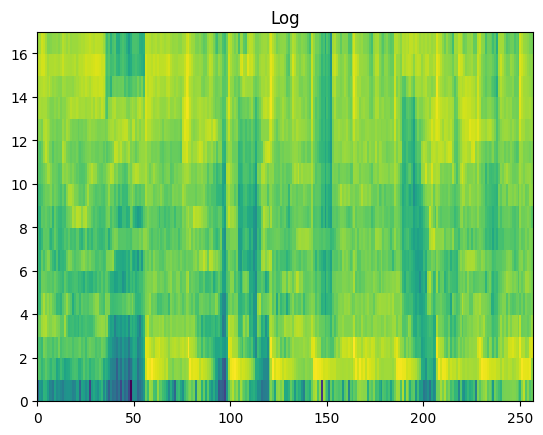

In [ ]:
def compute_bb(frame_spectra):
    bb = np.zeros([FRAME_COUNT, 17])

    frame_magspec = np.abs(frame_spectra)

    for n in range(0, int(FRAME_LENGTH / 2) + 1):
        bb[:, BarkScaleBandID[n]] += frame_magspec[:, n]

    return bb

BB = compute_bb(XX)

plt.figure()
plt.pcolor(BB.T)
plt.title('Raw')
plt.show()

plt.figure()
plt.pcolor(np.log(BB.T))
plt.title('Log')
plt.show()

<br>

**The Bark-scale energies obtained are now converted/compressed into a binary representation.** This representation has been chosen such that it is efficient for database queries and such that it is invariant to changes in loudness and some forms of degradations. The conversion/compression yields a $M \times 16$ elements binary fingerprint in two steps:

**The difference between neighboring Bark-scale energies is computed**, first in the frequency dimension and next in the temporal dimension. If $B(m,n)$ represents the 257x17 array `BB`, then the Bark-scale energy differences $e(m,n)$ are computed as follows: (for $m=0,\cdots,M-1, n=0,\cdots,16$):

\begin{equation}
   e(m,n) = \underbrace{\underbrace{(B(m+1,n+1)-B(m+1,n))}_{\mbox{difference between two neighboring} \\ \mbox{ bark scale band energies in frame m+1}}
   -\underbrace{((B(m,n+1)-B(m,n))}_{\mbox{difference between two neighboring} \\ \mbox{ bark scale band energies in frame m}}}_{\mbox{difference between two neighboring frames m+1 and m in same bark scale band n }} 
\end{equation}
<br>

**From this $M \times 16$ array, the values of the binary fingerprint are computed as follows:**

\begin{equation}
   b(m,n) = \left\{ \begin{array}{ll} 1 & \mbox{if } e(m,n) \ge 0, \\ 
                                      0 & \mbox{if } e(m,n) < 0, \end{array} \right.\quad
                                      \mbox{for } m=0,\cdots,M-1, n=0,\cdots,16.
\end{equation}

**Implement the above two operations, and compute the fingerprints for the loaded music clip. Display the fingerprint using a pseudo-color plot.** An example of the computed binary fingerprint is shown in the figure.

![PA.VII.2%28iii%29.png](graphics/PA.VII.2%28iii%29.png)
    
<br>

In [24]:
# Write your code here

<br>

You are now given a fingerprint of an unknown piece of music. **Load this $256 \times 16$ fingerprint from the file `data/fingerprint.pkl`. Compare the loaded fingerprint with the fingerprints computed from each of the 25 music clips (listed in the above table). Count the number of differences $D$ between the fingerprint pairs, and compute the Bit Error Rate (BER)** as $ BER=\frac{D}{256 \times 16}$. Make sure to show the BER for each music clip.

<br>

In [25]:
# Write your code here

<br>

**Please answer <i>all</i> of the following question:** From which song was the fingerprint `data/fingerprint.pkl` computed (refer to the BER values in your answer)? How well can a degraded version of the song be recognized? If you would need to build a detector that decides on basis of the BER if a song is recognized, which BER threshold would you choose for the detector and <i>why</i>?
    
<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div> 

<hr style="height:3px; border:none; background-color:blue;">